<hr style = "height:1px;border:none;background-color:green">

<h1>
    Homework 2
</h1>
<li>ME 5446 - Turbulence</li>
<li>Aidan McDonald</li>

<hr style = "height:1px;border:none;background-color:green">
<h3>Part (1)</h3>

In [1]:
"""
instantiate dataset
"""
from givernylocal.turbulence_dataset import *
from givernylocal.turbulence_toolkit import *

# This is the token to be used for this class
auth_token = 'edu.uwyo.me-5446-3f277ced'
dataset_title = 'isotropic1024coarse'
output_path = './giverny_output'

# instantiate the dataset.
dataset = turb_dataset(dataset_title = dataset_title, output_path = output_path, auth_token = auth_token)

<hr style = "height:1px;border:none;background-color:green">
<h3>Part (2)</h3>

In [2]:
# Check dir, spacing and N
print("dir(dataset): " + str(dir(dataset)))
print("spacing: " + str(dataset.spacing))
print("N: " + str(dataset.N))

dir(dataset): ['N', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', 'auth_token', 'dataset_title', 'dx', 'dy', 'dz', 'init_constants', 'output_path', 'spacing']
spacing: [0.00613592 0.00613592 0.00613592]
N: [1024 1024 1024]


<hr style = "height:1px;border:none;background-color:green">
<h3>Part (3)</h3>

In [3]:
[Lx, Ly, Lz] = dataset.spacing*dataset.N
print("Lx is 2pi: " + str(Lx == 2*np.pi))
print("Ly is 2pi: " + str(Ly == 2*np.pi))
print("Lz is 2pi: " + str(Lz == 2*np.pi))

Lx is 2pi: True
Ly is 2pi: True
Lz is 2pi: True


<hr style = "height:1px;border:none;background-color:green">
<h3>Part (4)</h3>

In [4]:
variable = 'velocity'
temporal_method = 'none'
spatial_method = 'lag8'
spatial_operator = 'field'

time = 5.0
n_points = 1025

x_points = np.linspace(0.0, 2*np.pi, n_points, dtype = np.float64)
y_points = np.pi
z_points = np.pi
        
points = np.zeros((n_points, 3), dtype = np.float64)
for i in range(n_points):
    points[i, 0] = x_points[i]  
    points[i, 1] = y_points
    points[i, 2] = z_points

"""
use the tools and processing gizmos.
"""
# process interpolation/differentiation of points.
result = getData(dataset, variable, time, temporal_method, spatial_method, spatial_operator, points)


-----
getData is processing...

total time elapsed = 1.821 seconds (0.030 minutes)

query completed successfully.
-----


In [5]:
u = np.array(result[0]) # result[0] is the pandas.DataFrame containing the data I want
print("u: " + str(u))
print("size(u): " + str(u.shape))
periodicityError = np.linalg.norm(u[-1,:]-u[0,:])
print("periodicityError: " + str(periodicityError))

u: [[-0.5625709   0.9115616  -0.18413484]
 [-0.5805541   0.87634623 -0.04950452]
 [-0.58334816  0.85320866  0.08243842]
 ...
 [-0.5569811   0.9778997  -0.17396383]
 [-0.55329615  0.94987124 -0.22419326]
 [-0.5625714   0.91156054 -0.184132  ]]
size(u): (1025, 3)
periodicityError: 3.078776e-06


<hr style = "height:1px;border:none;background-color:green">
<h3>Part (5)</h3>

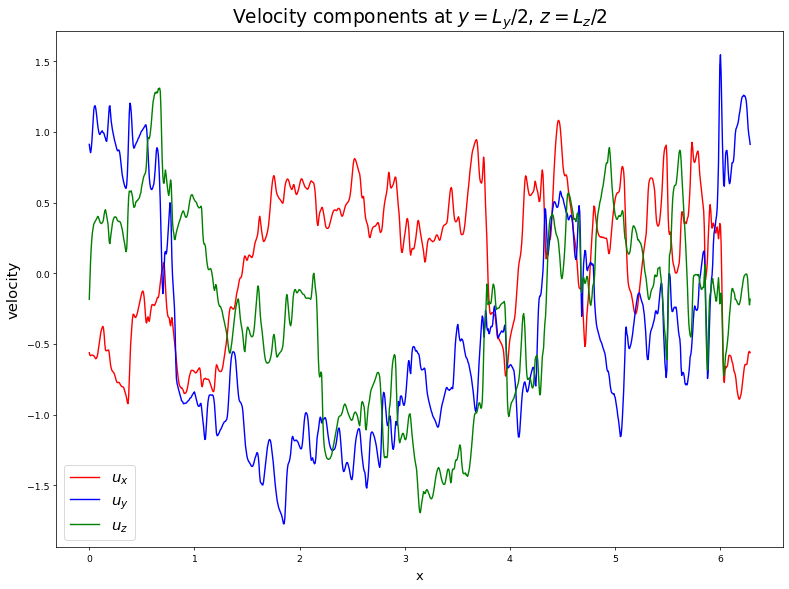

In [6]:
fig = plt.figure(figsize = (14, 10), dpi = 67)
plt.plot(x_points,u[:,0],'r',label="$u_x$")
plt.plot(x_points,u[:,1],'b',label="$u_y$")
plt.plot(x_points,u[:,2],'g',label="$u_z$")

plt.title(f'Velocity components at $y=L_y/2$, $z = L_z/2$', fontsize = 20)
plt.xlabel('x', labelpad = 7, fontsize = 14)
plt.ylabel('velocity', labelpad = 7, fontsize = 16)
plt.legend(loc="best", fontsize = 16)
plt.show()

<hr style = "height:1px;border:none;background-color:green">
<h3>Part (6)</h3>

In [7]:
N = 1024
fft = np.fft.rfft(u[0:-1,:], axis = 0)/N

In [8]:
print(fft)

[[ 1.11382970e-01+0.00000000e+00j -4.41177329e-01+0.00000000e+00j
  -2.66128923e-01+0.00000000e+00j]
 [-1.82648090e-01+7.96777865e-02j  3.36571123e-01+1.80534771e-01j
   3.59959268e-01+3.58339065e-02j]
 [-5.20041570e-02+1.63130430e-01j  1.90682567e-01-1.50049319e-01j
  -1.40055273e-01-7.03088526e-02j]
 ...
 [-1.30333665e-09-8.18883869e-09j -3.23899654e-09+4.50147750e-09j
  -4.25966415e-09-4.80885693e-09j]
 [ 1.76763591e-09-4.93987000e-09j  6.27845653e-09+2.44846882e-09j
  -2.78583676e-09+5.70675156e-09j]
 [ 7.86451437e-09+0.00000000e+00j  8.83801476e-10+0.00000000e+00j
  -3.77855258e-09+0.00000000e+00j]]


<hr style = "height:1px;border:none;background-color:green">
<h3>Part (7)</h3>

In [9]:
n_plotpoints = 2000
x_plotpoints = np.linspace(0.0, 2*np.pi, n_plotpoints, dtype = np.float64)
# Complex Fourier series approximation
SM_c2 = np.zeros((n_plotpoints,3), dtype=np.complex64)
# Let's use fancy loops available in Python
for m, Fm in enumerate(fft):
    for i in range(3):
        # Sum from 0 to +M
        SM_c2[:,i] += Fm[i] * np.exp(2j * np.pi * m * x_plotpoints / Lx)
        # Sum from -M to -1
        if m != 0:
            SM_c2[:,i] += Fm[i].conjugate() * np.exp(-2j * np.pi * m * x_plotpoints / Lx)

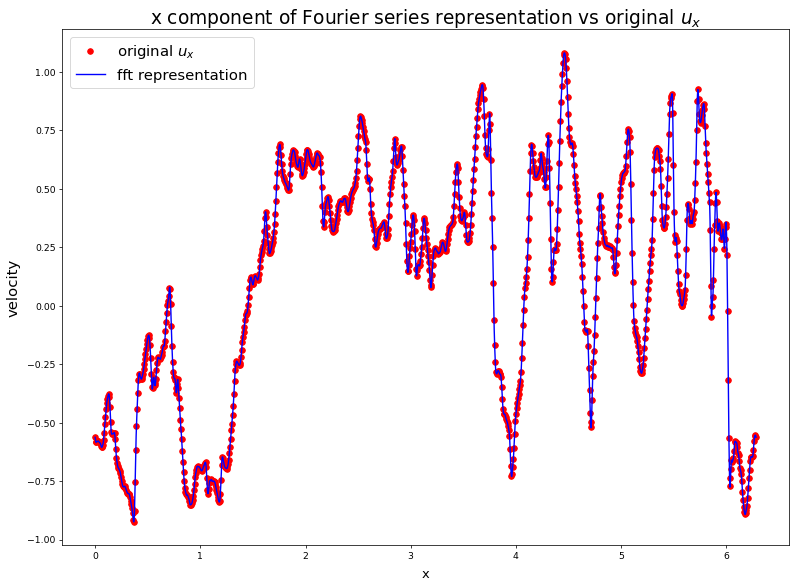

In [10]:
fig2 = plt.figure(figsize = (14, 10), dpi = 67)
plt.plot(x_points,u[:,0],'ro',label="original $u_x$")
plt.plot(x_plotpoints,np.real(SM_c2[:,0]),'b',label="fft representation")

plt.title(f'x component of Fourier series representation vs original $u_x$', fontsize = 20)
plt.xlabel('x', labelpad = 7, fontsize = 14)
plt.ylabel('velocity', labelpad = 7, fontsize = 16)
plt.legend(loc="upper left", fontsize = 16)

plt.show()

<hr style = "height:1px;border:none;background-color:green">
<h3>Part (8)</h3>

In [33]:
# Derivative from fft coefficients
SM_D = np.zeros((n_plotpoints,3), dtype=np.complex64)
for m, Fm in enumerate(fft):
    d_Fm = 2*np.pi*m/Lx*1j*Fm # get coefficient of the derivative
    for i in range(3):
        # Sum from 0 to +M
        SM_D[:,i] += d_Fm[i] * np.exp(2j * np.pi * m * x_plotpoints / Lx)
        # Sum from -M to -1
        if m != 0:
            SM_D[:,i] += d_Fm[i].conjugate() * np.exp(-2j * np.pi * m * x_plotpoints / Lx)

In [34]:
D_SM_c2 = np.gradient(np.real(SM_c2[:,0]),dataset.spacing[0])

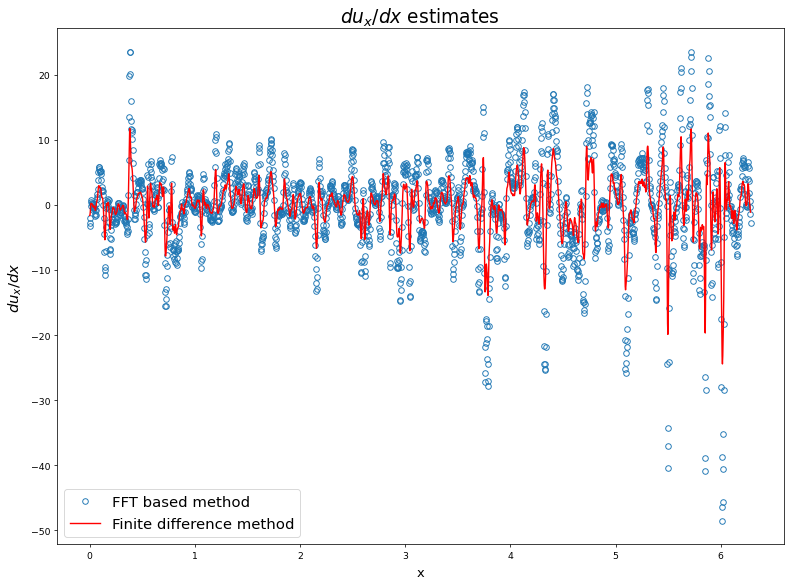

In [35]:
fig3 = plt.figure(figsize = (14, 10), dpi = 67)
plt.plot(x_plotpoints,np.real(SM_D[:,0]),'o',label="FFT based method", markerfacecolor="none")
plt.plot(x_plotpoints,D_SM_c2,'r',label="Finite difference method")

plt.title(f'$du_x/dx$ estimates', fontsize = 20)
plt.xlabel('x', labelpad = 7, fontsize = 14)
plt.ylabel('$du_x/dx$', labelpad = 7, fontsize = 16)
plt.legend(loc="best", fontsize = 16)

plt.show()

<hr style = "height:1px;border:none;background-color:green">
<h3>Part (9)</h3>

In [19]:
def spatialFilter(u):
    Delta = Lx/32
    u_bar = np.zeros(N+1)
    for i in range(N):
        integration_index_range = range(int(np.floor(i-1/2*N/32)),int(np.ceil(i+1/2*N/32)))
        integration_us = []
        for j in integration_index_range:
            integration_us.append(u[j%N])
        u_bar[i] = 1/Delta*np.trapz(integration_us, dx = dataset.dx)
    u_bar[N] = u_bar[0]
    return u_bar

In [20]:
u_bar = spatialFilter(u[:,0])

In [21]:
u_residual = u[:,0]-u_bar
filtered_residual = spatialFilter(u_residual)

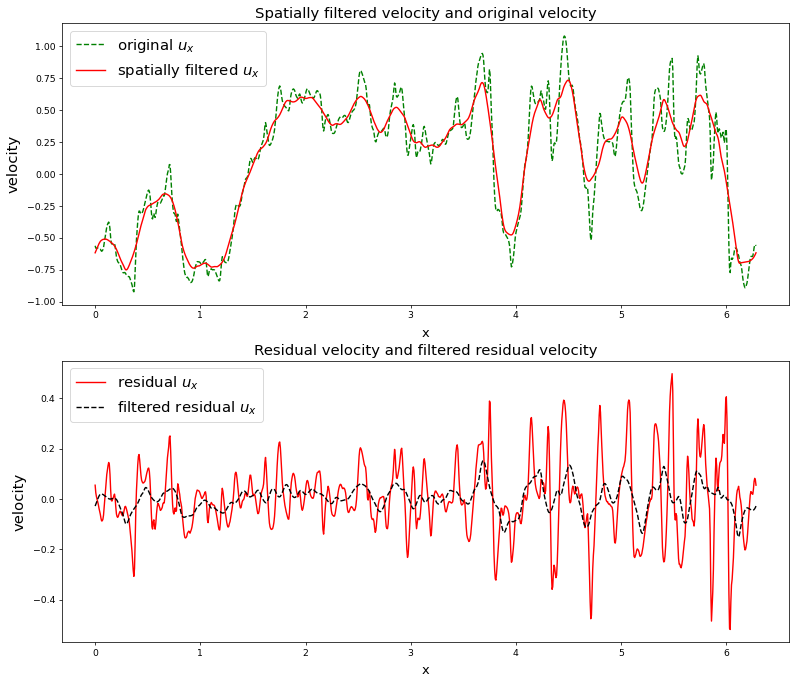

In [22]:
fig4, (ax1, ax2) = plt.subplots(2,1, figsize = (14, 12), dpi = 67)
ax1.plot(x_points,u[:,0],'g--',label="original $u_x$")
ax1.plot(x_points,u_bar,'r',label="spatially filtered $u_x$")
ax1.set_title(f'Spatially filtered velocity and original velocity', fontsize = 16)
ax1.set_xlabel('x', labelpad = 7, fontsize = 14)
ax1.set_ylabel('velocity', labelpad = 7, fontsize = 16)
ax1.legend(loc="best", fontsize = 16)

ax2.plot(x_points,u_residual, 'r', label = "residual $u_x$")
ax2.plot(x_points,filtered_residual, 'k--', label="filtered residual $u_x$")
ax2.set_title(f'Residual velocity and filtered residual velocity', fontsize = 16)
ax2.set_xlabel('x', labelpad = 7, fontsize = 14)
ax2.set_ylabel('velocity', labelpad = 7, fontsize = 16)
ax2.legend(loc="best", fontsize = 16)

plt.show()

<hr style = "height:1px;border:none;background-color:green">
<h3>Part (10)</h3>

Note: I expect the filtered residual velocity to be 0:
The residual velocity will be exactly equal to 
the sum of the higher order modes, which will all
be set to 0 by the filter

In [23]:
def spectralFilter(u):
    fft = np.fft.rfft(u[:-1])/N
    K = 32
    # Complex Fourier series approximation
    SM_c2 = np.zeros(N, dtype=np.complex64)
    # Let's use fancy loops available in Python
    for m, Fm in enumerate(fft):
        if m<=K: # Only add contributions from low-order modes
            # Sum from 0 to +M
            SM_c2 += Fm * np.exp(2j * np.pi * m * x_points[:-1] / Lx)
            # Sum from -M to -1
            if m != 0:
                SM_c2 += Fm.conjugate() * np.exp(-2j * np.pi * m * x_points[:-1] / Lx)
    u_bar = np.real(SM_c2)
    u_bar = np.append(u_bar,u_bar[0])
    return u_bar

In [24]:
u_bar = spectralFilter(u[:,0])

In [25]:
u_residual = u[:,0]-u_bar
filtered_residual = spectralFilter(u_residual)

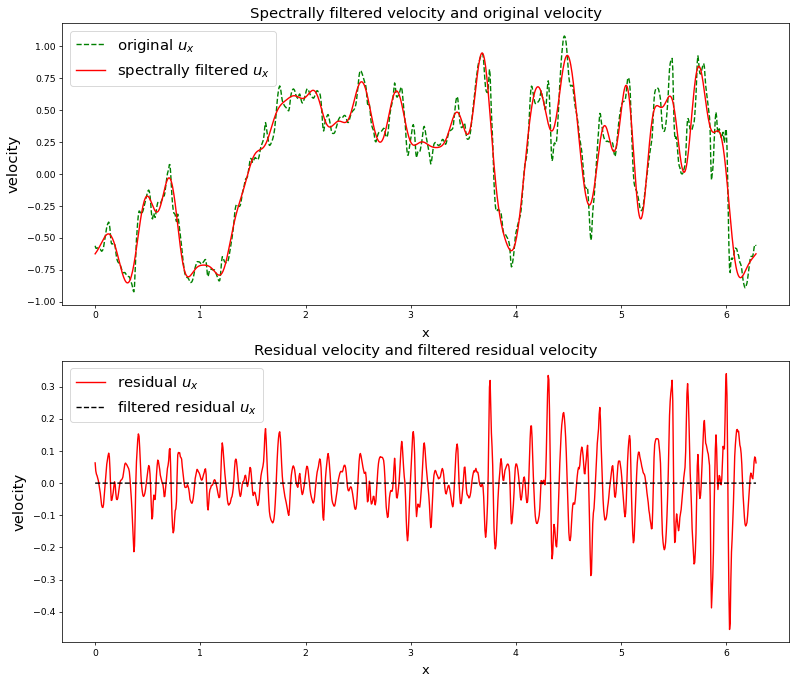

In [26]:
fig5, (ax1, ax2) = plt.subplots(2,1, figsize = (14, 12), dpi = 67)
ax1.plot(x_points,u[:,0],'g--',label="original $u_x$")
ax1.plot(x_points,u_bar,'r',label="spectrally filtered $u_x$")
ax1.set_title(f'Spectrally filtered velocity and original velocity', fontsize = 16)
ax1.set_xlabel('x', labelpad = 7, fontsize = 14)
ax1.set_ylabel('velocity', labelpad = 7, fontsize = 16)
ax1.legend(loc="best", fontsize = 16)

ax2.plot(x_points,u_residual, 'r', label = "residual $u_x$")
ax2.plot(x_points,filtered_residual, 'k--', label="filtered residual $u_x$")
ax2.set_title(f'Residual velocity and filtered residual velocity', fontsize = 16)
ax2.set_xlabel('x', labelpad = 7, fontsize = 14)
ax2.set_ylabel('velocity', labelpad = 7, fontsize = 16)
ax2.legend(loc="best", fontsize = 16)

plt.show()